# Download data from synapse for mPower

In [39]:
import synapseclient
import synapseutils
import numpy as np
import pandas as pd
import pickle
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
syn = synapseclient.login()

Welcome, Daniel Wu!




UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.0.0) is available. Your version (1.9.4) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.0.0 release notes

https://python-docs.synapse.org/build/html/news.html



In [3]:
mPowerWalkID = 'syn5511449'

In [4]:
walkTable = syn.tableQuery('SELECT * FROM ' + mPowerWalkID)

In [5]:
walkTable.asDataFrame()

,recordId,healthCode,createdOn,appVersion,phoneInfo,accel_walking_outbound.json.items,deviceMotion_walking_outbound.json.items,pedometer_walking_outbound.json.items,accel_walking_return.json.items,deviceMotion_walking_return.json.items,pedometer_walking_return.json.items,accel_walking_rest.json.items,deviceMotion_walking_rest.json.items,medTimepoint
38953_6,704fda87-91c7-4c67-b520-b8e189f7f7f7,639e8a78-3631-4231-bda1-c911c1b169e5,1425904778000,"version 1.0, build 7",iPhone 6,5390078.0,5390094.0,5390112.0,5390129.0,5390152.0,5390172.0,5390188.0,5390205.0,I don't take Parkinson medications
38954_6,eac28a30-63fd-445e-b109-1f948170033f,639e8a78-3631-4231-bda1-c911c1b169e5,1425904852000,"version 1.0, build 7",iPhone 6,5389805.0,5389819.0,5389838.0,5389853.0,5389869.0,5389886.0,5389901.0,5389918.0,I don't take Parkinson medications
38955_6,e8d73f87-1c77-4bde-99f7-f2a0ec3c4350,639e8a78-3631-4231-bda1-c911c1b169e5,1425905044000,"version 1.0, build 7",iPhone 6,5390882.0,5390894.0,5390906.0,5390921.0,5390933.0,5390948.0,5390964.0,5390980.0,I don't take Parkinson medications
38956_6,a88ca2fb-51d9-400f-ba7c-873725aac8b3,67bdd316-26fc-4fc7-8431-bf9f41a649dd,1425926858000,"version 1.0, build 7",iPhone 6 Plus,5397695.0,5397710.0,5397726.0,5397743.0,5397753.0,5397769.0,5397784.0,5397793.0,I don't take Parkinson medications
38957_6,67b21c50-1143-4289-b8df-1ee238d3a50e,a9b28b95-b9ee-4442-98c9-1cf9b8cf4a36,1425927166000,"version 1.0, build 7",iPhone 6 Plus,5402993.0,5403009.0,5403025.0,5403041.0,5403057.0,5403071.0,5403087.0,5403113.0,I don't take Parkinson medications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74358_10,81fc4932-1c16-413e-98e3-889c41c3b98a,549e0f48-4f8c-41be-9912-d85c709bdbdf,1441837249000,"version 1.1, build 22",iPhone 6 Plus,6126951.0,6126966.0,6126978.0,NaN,NaN,NaN,6127009.0,6127035.0,Another time
74359_10,0e4c9513-305c-4aec-836c-0e7f9a78ed02,a11611b4-6a24-4f6c-ae18-d93b849ef188,1441837477000,"version 1.1, build 22",iPhone 6,6126268.0,6126286.0,6126301.0,NaN,NaN,NaN,6126331.0,6126367.0,I don't take Parkinson medications
74360_10,125f3145-2e0d-4170-af78-37d9fc9af750,95e124bb-e9bf-4f06-916c-4a679be5c623,1441839678000,"version 1.1, build 22",iPhone 6,6126373.0,6126381.0,6126398.0,NaN,NaN,NaN,6126426.0,6126462.0,Another time
74361_10,2ed56c07-3af3-4f36-bdf8-700e225ab275,1c9d0333-b4ac-474d-ac87-f7941fb02443,1441841966000,"version 1.1, build 22",iPhone 5 (GSM),6126854.0,6126870.0,NaN,NaN,NaN,NaN,6126887.0,6126918.0,I don't take Parkinson medications


In [6]:
def save_dict(di_, filename_):
    with open(filename_, 'wb') as f:
        pickle.dump(di_, f)

In [7]:
files = syn.downloadTableColumns(walkTable, "accel_walking_outbound.json.items")
save_dict(files, "accel_outbound.pkl")

[WARNING] /home/groups/euan/users/danjwu/miniconda3/envs/MHC/lib/python3.6/site-packages/synapseclient/client.py:3294: UserWarning: Weird file handle: None
  warnings.warn("Weird file handle: %s" % file_handle_id)



In [ ]:
files = syn.downloadTableColumns(walkTable, "accel_walking_return.json.items")
save_dict(files, "accel_return.pkl")

In [8]:
DMOutfiles = syn.downloadTableColumns(walkTable, "deviceMotion_walking_outbound.json.items")
save_dict(DMOutfiles, "DM_outbound.pkl")

In [9]:
DMReturnfiles = syn.downloadTableColumns(walkTable, "deviceMotion_walking_return.json.items")
save_dict(DMReturnfiles, "DM_return.pkl")

# Ok now make a dataframe with the file paths

In [41]:
df = walkTable.asDataFrame()
print(df.shape)
df = df.dropna()
print(df.shape)

(35410, 14)
(23792, 14)


In [42]:
names = [('accel_outbound.pkl', 'accel_walking_outbound.json.items'),
        ('accel_return.pkl', 'accel_walking_return.json.items'),
        ('DM_outbound.pkl', 'deviceMotion_walking_outbound.json.items'),
        ('DM_return.pkl', 'deviceMotion_walking_return.json.items')]

for pickle_name, column_name in names:
    with open(pickle_name, 'rb') as f:
        filenames = pickle.load(f)
    df.loc[:, column_name] = df.loc[:, column_name].astype(int).astype(str).map(filenames)
df = df.drop(columns=['createdOn', 'appVersion', 'pedometer_walking_outbound.json.items', 'pedometer_walking_return.json.items', 'accel_walking_rest.json.items', 'deviceMotion_walking_rest.json.items'])
df

,recordId,healthCode,phoneInfo,accel_walking_outbound.json.items,deviceMotion_walking_outbound.json.items,accel_walking_return.json.items,deviceMotion_walking_return.json.items,medTimepoint
38953_6,704fda87-91c7-4c67-b520-b8e189f7f7f7,639e8a78-3631-4231-bda1-c911c1b169e5,iPhone 6,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,I don't take Parkinson medications
38954_6,eac28a30-63fd-445e-b109-1f948170033f,639e8a78-3631-4231-bda1-c911c1b169e5,iPhone 6,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,I don't take Parkinson medications
38955_6,e8d73f87-1c77-4bde-99f7-f2a0ec3c4350,639e8a78-3631-4231-bda1-c911c1b169e5,iPhone 6,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,I don't take Parkinson medications
38956_6,a88ca2fb-51d9-400f-ba7c-873725aac8b3,67bdd316-26fc-4fc7-8431-bf9f41a649dd,iPhone 6 Plus,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,I don't take Parkinson medications
38957_6,67b21c50-1143-4289-b8df-1ee238d3a50e,a9b28b95-b9ee-4442-98c9-1cf9b8cf4a36,iPhone 6 Plus,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,I don't take Parkinson medications
...,...,...,...,...,...,...,...,...
72677_10,8f7d90a1-dc9c-4729-850d-ad3a7d5d5918,15cd9496-900a-44bb-948b-12a24b101615,iPhone 6 Plus,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,Another time
72852_10,d1c5e6d4-8567-4139-9db2-f1a2d0c35f3a,15cd9496-900a-44bb-948b-12a24b101615,iPhone 6 Plus,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,Another time
72910_10,5ce56812-e081-4af1-b680-bc7fe3163ff6,15cd9496-900a-44bb-948b-12a24b101615,iPhone 6 Plus,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,Another time
72921_10,69b8ac4d-50e5-46fc-a2e2-0469d0f705a7,15cd9496-900a-44bb-948b-12a24b101615,iPhone 6 Plus,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,/oak/stanford/groups/euan/projects/mhc/code/da...,Another time


In [43]:
df.to_csv('mPower_filepaths.csv')

In [2]:
df = pd.read_csv('mPower_filepaths.csv')

In [10]:
for idx, row in df.iterrows():
    print(row)
    break

Unnamed: 0                                                                            38953_6
recordId                                                 704fda87-91c7-4c67-b520-b8e189f7f7f7
healthCode                                               639e8a78-3631-4231-bda1-c911c1b169e5
phoneInfo                                                                            iPhone 6
accel_walking_outbound.json.items           /oak/stanford/groups/euan/projects/mhc/code/da...
deviceMotion_walking_outbound.json.items    /oak/stanford/groups/euan/projects/mhc/code/da...
accel_walking_return.json.items             /oak/stanford/groups/euan/projects/mhc/code/da...
deviceMotion_walking_return.json.items      /oak/stanford/groups/euan/projects/mhc/code/da...
medTimepoint                                               I don't take Parkinson medications
Name: 0, dtype: object


# What's inside these files??

In [2]:
names = [('accel_outbound.pkl', 'accel_walking_outbound.json.items'),
        ('accel_return.pkl', 'accel_walking_return.json.items'),
        ('DM_outbound.pkl', 'deviceMotion_walking_outbound.json.items'),
        ('DM_return.pkl', 'deviceMotion_walking_return.json.items')]

for pickle_name, column_name in names:
    with open(pickle_name, 'rb') as f:
        filename = list(pickle.load(f).values())[0]
    with open(filename, 'r') as f:
        data = json.load(f)
    print(pickle_name)
    print(len(data))
    print(data[0:3], "............")

accel_outbound.pkl
1298
[{'y': 1.162567138671875, 'timestamp': 5913.578209625, 'z': 0.1293792724609375, 'x': 0.5006866455078125}, {'y': 1.19012451171875, 'timestamp': 5913.588205625, 'z': 0.300201416015625, 'x': 0.47198486328125}, {'y': 1.12371826171875, 'timestamp': 5913.598181625001, 'z': 0.339569091796875, 'x': 0.3677825927734375}] ............
accel_return.pkl
1259
[{'y': 0.8919219970703125, 'timestamp': 5926.742665625, 'z': -0.071014404296875, 'x': -0.033721923828125}, {'y': 0.8867340087890625, 'timestamp': 5926.752623625001, 'z': -0.15374755859375, 'x': -0.0219573974609375}, {'y': 0.861663818359375, 'timestamp': 5926.762621625, 'z': -0.259552001953125, 'x': 0.01470947265625}] ............
DM_outbound.pkl
1286
[{'attitude': {'y': 0.2904226341939929, 'w': 0.6671020714868305, 'z': -0.003206284519803817, 'x': -0.6860169382058869}, 'timestamp': 5913.586966625, 'rotationRate': {'x': -1.635123491287231, 'y': 0.3930832147598267, 'z': -2.230105638504028}, 'userAcceleration': {'x': 0.11760

# Step 1: Concatenate outbound & return files for each user, and save in a new file names w the healthcode in raw_datas

In [16]:
lengths = []
for idx, row in df.iterrows():
    
    #Progress
    if idx %100 == 0:
        print(idx)
    
    hc = row['healthCode']
    path = "raw_data/" + str(hc) + '.json'
    
    if os.path.exists(path):
        continue
    
    #load outbound
    with open(row['deviceMotion_walking_outbound.json.items'], 'r') as f:
        out = json.load(f)
        
    #load return
    with open(row['deviceMotion_walking_return.json.items'], 'r') as f:
        ret = json.load(f)
    
    #Skip nulls
    if out == None or ret == None:
        print("NULL detected in row ", idx, "hc:", hc)
        continue
    
    #concatenate
    data = out + ret
    
    #record length
    lengths.append(len(data))
    
    #Save new data
    with open(path, 'w') as f:
        json.dump(data, f)
        


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

# Let's find out the lengths of these things


In [26]:
lengths = []
for filename in os.listdir('raw_data'):
    with open('raw_data/' + filename, 'r') as f:
        lengths.append(len(json.load(f)))

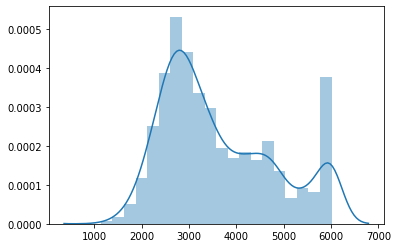

In [29]:
import seaborn as sns
sns.distplot(lengths)

# Ok, so we want to use the devicemotion files, and turn it into npy arrays

## Data format
In the data_dir, there are a bunch of folders, one for each healthcode, and within each folder are 6mwts, 
which are csvs of jsons, with each json containing sensor output at one time point.

These jsons look like
```
{
   "attitude":{
      "y":-0.03487920366505713,
      "w":0.9394503418180431,
      "z":-7.491047363778288E-5,
      "x":0.3409053986050595
   },
   "timestamp":774156.1758219167,
   "rotationRate":{
      "x":1.070695281028748,
      "y":-0.3411484956741333,
      "z":0.03567945212125778
   },
   "userAcceleration":{
      "x":0.1850360929965973,
      "y":-0.1425484418869019,
      "z":0.1346407383680344
   },
   "gravity":{
      "x":-0.06548348814249039,
      "y":-0.6405326128005981,
      "z":-0.7651339173316956
   },
   "magneticField":{
      "y":0,
      "z":0,
      "x":0,
      "accuracy":-1
   }
}
```


In [17]:
out_path = r"processed_data"
data_dir = r"raw_data"

In [18]:
def extract_json(json_data):
    '''
    Takes in a 6mwt in MHC format: list of dict objects, with each dict
    containing a single time point formatted as described above.
    
    Returns a (n x 15) numpy array, where the channels are:
    (a_x, a_y, a_z, a_mag, r_x, r_y, r_z, r_mag, att_x, att_y, att_z, att_w, grav_x, grav_y, grav_z)
    and n is the number of jsons, and also a (n,) array of corresponding timestamps
    '''

    data = []
    times = []
    
    #Convert data from list of json to a pandas dataframe
    for row in json_data:
        acc = row['userAcceleration']
        rot = row['rotationRate']
        att = row['attitude']
        grv = row['gravity']
        time = row['timestamp']
        
        entry = [acc['x'],
                 acc['y'],
                 acc['z'],
                 rot['x'],
                 rot['y'],
                 rot['z'],
                 att['x'],
                 att['y'],
                 att['z'],
                 att['w'],
                 grv['x'],
                 grv['y'],
                 grv['z']
                 ]
        data.append(entry)
        times.append(time)
    
    data = np.array(data)
    times = np.array(times)
    
    #Augment data with magnitude and rotational magnitude vectors
    a_mag = np.sqrt(np.square(data[:, 0:3]).sum(axis=1))
    r_mag = np.sqrt(np.square(data[:, 3:6]).sum(axis=1))
    
    data = np.insert(data, 6, r_mag, axis = 1)
    data = np.insert(data, 3, a_mag, axis = 1)

    return data, times

In [19]:
with open('raw_data/ffd42c31-63ae-49aa-93fc-04e276b6d945.json', 'r') as file:
    data = json.load(file)
#df = pd.DataFrame(data)
print(extract_json(data)[0][0])
extract_json(data)

[ 5.35742426e-03 -1.01039018e-02  2.55050436e-05  1.14364102e-02
 -4.47563268e-03  1.83818918e-02 -3.57352104e-03  1.92534487e-02
 -5.15150482e-01 -4.72304546e-01 -3.53479441e-05  7.15226115e-01
 -6.75645530e-01  7.36864746e-01 -2.30967943e-02]


(array([[ 5.35742426e-03, -1.01039018e-02,  2.55050436e-05, ...,
         -6.75645530e-01,  7.36864746e-01, -2.30967943e-02],
        [ 5.71626192e-03, -1.16140787e-02,  2.04673246e-03, ...,
         -6.76050127e-01,  7.36498117e-01, -2.29512732e-02],
        [ 5.21996431e-03, -1.32416412e-02,  2.08215951e-03, ...,
         -6.76576138e-01,  7.36019969e-01, -2.27883365e-02],
        ...,
        [ 3.71387787e-02,  1.94390416e-02,  2.96227396e-01, ...,
         -7.14323819e-01,  6.99814498e-01,  1.05959631e-03],
        [ 8.75374600e-02,  1.46944902e-03,  2.59504825e-01, ...,
         -7.15375602e-01,  6.98710620e-01, -6.42254204e-03],
        [ 8.28945860e-02, -3.02804797e-03,  2.14913085e-01, ...,
         -7.15676546e-01,  6.98325276e-01, -1.22000724e-02]]),
 array([61836.53422054, 61836.54526754, 61836.55631454, ...,
        61864.00637054, 61864.01741754, 61864.02846954]))

In [35]:
from json import JSONDecodeError

#Iterate through all the records in the directory
all_hcs = []
for filename in os.listdir('raw_data'):
    
    healthCode = filename.split('.')[0]

    #Load in data
    with open(os.path.join('raw_data', filename), 'r') as file:
        try:
            json_data = json.load(file)
        except JSONDecodeError:
            print('Invalid json', os.path.join('raw_data', filename), flush = True)
            continue

    #if type(json_data) is dict:
    #    json_data = json_data['items']
    #    print('Weird Dict Format.', flush=True)

    #Extract
    try:
        data, ts = extract_json(json_data)
    except:
        print(healthCode)
        #print(json_data)
        print(10/0)

    #Report
    print(f"Healthcode {healthCode} had {ts.shape[0]} data points.", flush=True)

    #if ts.shape[0] < 30000 or ts.shape[0] > 40000:
    #    print(f'Invalid amount of data, discarding.')
    #    continue


    #Save the npy array
    np.save(os.path.join(out_path, 'raw', healthCode), data)
    np.save(os.path.join(out_path, 'ts', healthCode), ts)
    all_hcs.append(healthCode)


np.save(os.path.join(out_path, 'all_healthcodes'), all_hcs)

Healthcode e24cad91-c2df-4205-847c-aeaa6f17bb23 had 2505 data points.
Healthcode 02350706-c0eb-4604-8643-91ca6c778ebb had 5530 data points.
Healthcode 6700ea5d-1ce2-418a-9600-57d431323318 had 3840 data points.
Healthcode 4bdfcb1d-6cf3-4210-a962-adb45070202f had 3420 data points.
Healthcode b920f3d8-722e-404d-a711-8ed99b708883 had 4995 data points.
Healthcode 41d94f62-3ffc-4853-83c1-99f2a40e1add had 5987 data points.
Healthcode 41b79277-cac9-42df-b6e9-7314f6c13f3c had 3165 data points.
Healthcode 9c1678e3-0311-4460-aec7-33f16707dff4 had 2232 data points.
Healthcode 1763614b-53fb-4d3d-a132-ad38d6a8cefa had 2353 data points.
Healthcode 6899ba07-f868-49db-9651-3504b6d754d6 had 2843 data points.
Healthcode d3ff5876-d53e-488c-be52-67b0242a9ee9 had 4753 data points.
Healthcode 8d62ec4d-6ea6-4894-9212-7ec8e334dff6 had 3318 data points.
Healthcode eafc5b43-71a1-401a-80d6-e97a21717a3a had 3464 data points.
Healthcode d999457e-c004-42f2-8806-13ef85e6a2a5 had 4402 data points.
Healthcode fa735991-

(3276, 15)


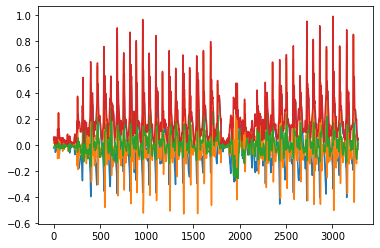

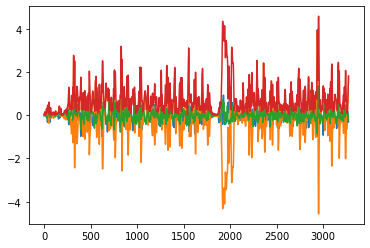

(3331, 15)


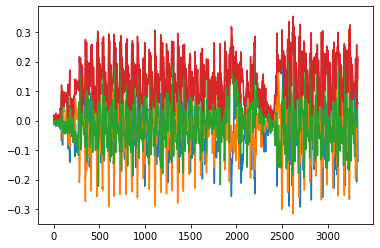

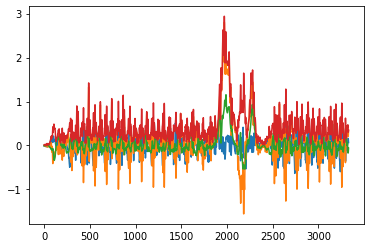

(4400, 15)


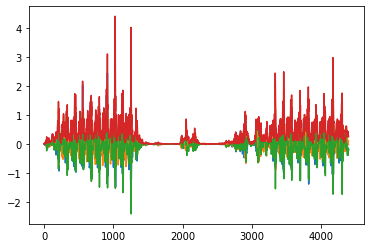

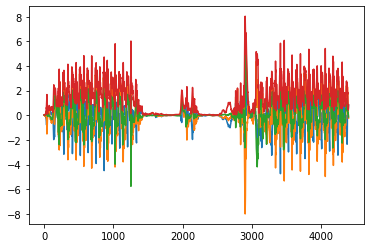

(5985, 15)


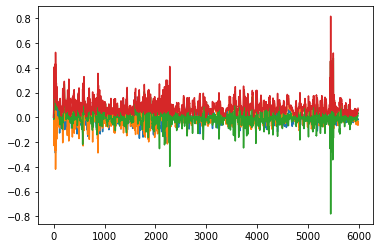

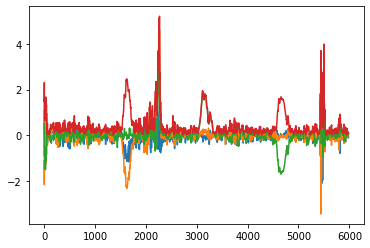

(2222, 15)


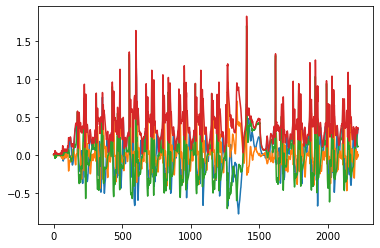

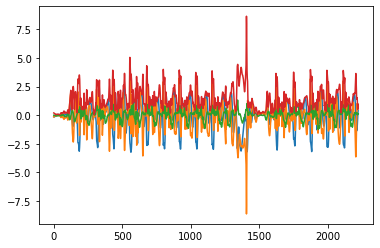

(4205, 15)


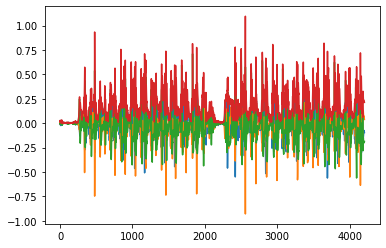

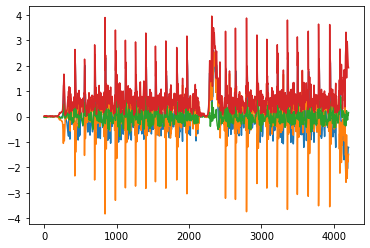

(3651, 15)


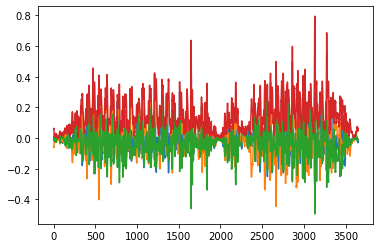

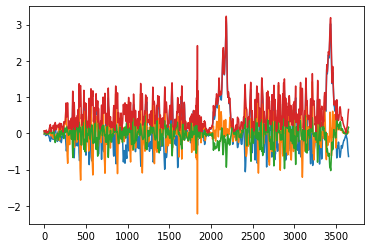

(4440, 15)


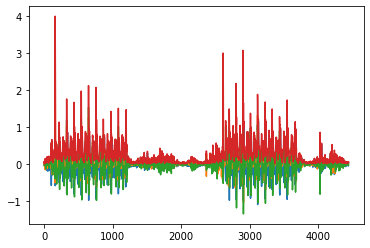

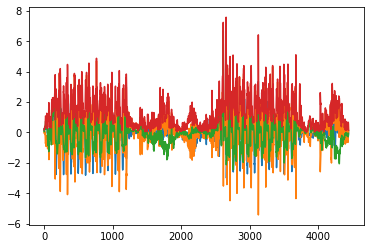

(2753, 15)


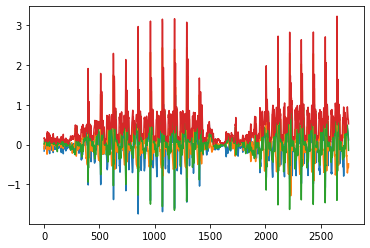

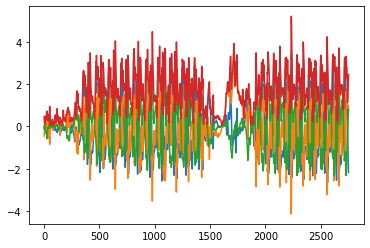

(4581, 15)


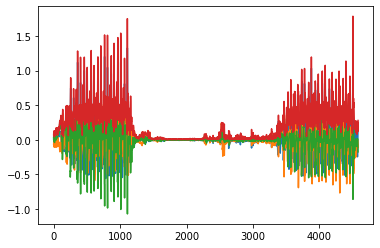

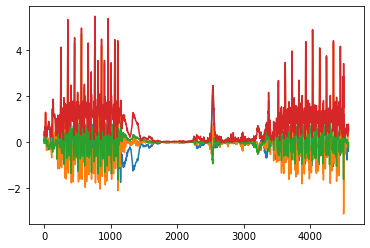

(3136, 15)


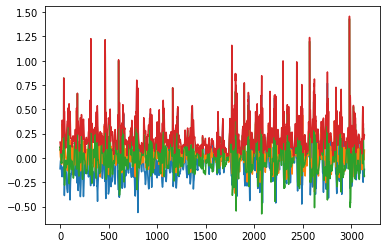

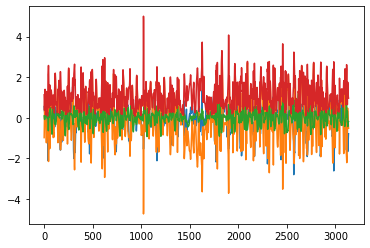

In [42]:
#Look at some data

counter = 0
for filename in os.listdir('processed_data/raw'):
    path = os.path.join('processed_data/raw', filename)
    six_mwt = np.load(path)
    print(six_mwt.shape)
    plt.figure()
    plt.plot(six_mwt[:, 0:4])
    plt.show()
    
    plt.figure()
    plt.plot(six_mwt[:, 4:8])
    plt.show()
    
    counter += 1
    if counter > 10:
        break


In [ ]:
# We have 8270 total users who did 6mwt
data_path = 'processed_data/raw'

def get_gender_hcs():
    '''
    Returns a list of healthcodes for extraction. Takes in a path to a tsv table.
    '''
    table_folder = "/oak/stanford/groups/euan/projects/mhc/data/tables"
    table_path = os.path.join(table_folder, 'cardiovascular-NonIdentifiableDemographicsTask-v2.tsv')

    df = pd.read_csv(table_path, sep='\t')
    df = df[['healthCode', 
             'NonIdentifiableDemographics.json.patientBiologicalSex', 
             'NonIdentifiableDemographics.patientBiologicalSex']]

    print(f"Starting with {df.shape[0]} records")

    #Merge weights and heights
    df['Sex'] = df['NonIdentifiableDemographics.patientBiologicalSex'].fillna(df['NonIdentifiableDemographics.json.patientBiologicalSex'])
    df = df[['healthCode', 'Sex']]

    df = df.dropna()
    print(f"Dropping NaNs gives {df.shape[0]} users")

    #Drop duplicates
    df = df.set_index('healthCode')
    df = df.loc[~df.index.duplicated(keep='last')]
    print(f"Dropping duplicate healthcodes gives {df.shape[0]} users")

    df = df[(df.Sex == 'Male') | (df.Sex == 'Female')]
    print(f"Dropping invalid sex values gives {df.shape[0]} users")
    
    return list(df.index), df


# Parse feature dataset with windows, with intermittent saving
window_size = 100 #1 second
window_overlap = 50 #0.5 seconds

target = 'jointProblem'

temp_dir = f'temp_dirs/{target}_temp'

if not os.path.exists(temp_dir):
    os.mkdir(temp_dir)
    os.mknod(temp_dir + '/done.txt')

#Define which healthcodes you want
valid_hcs, df = get_heartrisk_hcs()

with open(os.path.join(temp_dir, 'done.txt'), 'r') as progress_file:
    done_hcs = [x.strip() for x in progress_file.readlines()]

print(f'Finished {len(done_hcs)} last time, continuing.')

for filename in os.listdir(data_path):
    hc = filename[:-4]
    if hc in valid_hcs and hc not in done_hcs:
        data = []
        labels = []
        ids = []

        path = os.path.join(data_path, filename)
        six_mwt = np.load(path)
        
        curr_pos = 0
        while curr_pos < (six_mwt.shape[0] - window_size):
            window = six_mwt[curr_pos : curr_pos + window_size]
            curr_pos += window_size - window_overlap
        
            try:
                data.append(window)
                labels.append(df.loc[hc, target])
                ids.append(hc)
            except TypeError as e:
                print(e)
        print(hc)
        
        data = np.dstack(data).transpose((2, 0, 1))
        labels = np.array(labels)
        ids = np.array(ids)
        print(data.shape, labels.shape, ids.shape)
        np.save(os.path.join(temp_dir, f'{hc}_data.npy'), data)
        np.save(os.path.join(temp_dir, f'{hc}_labels.npy'), labels)
        np.save(os.path.join(temp_dir, f'{hc}_ids.npy'), ids)
        
        with open(os.path.join(temp_dir, "done.txt"), "a") as progress_file:
            progress_file.write(hc + '\n')
        


In [ ]:


# In[8]:


#Concatenate all the npys and save the dataset, intermittently
temp_dir = f'temp_dirs/{target}_temp'
temp_dir2 = f'temp_dirs/{target}_chunked'

if not os.path.exists(temp_dir2):
    os.mkdir(temp_dir2)
    os.mknod(temp_dir2 + '/done.txt')

with open(os.path.join(temp_dir, 'done.txt'), 'r') as progress_file:
    all_hcs = [x.strip() for x in progress_file.readlines()]
 
chunk_size = 500
num_chunks = len(all_hcs) // chunk_size + 1
print(f'There are {len(all_hcs)} healthcodes, which will be saved in {num_chunks} chunks.')

start_chunk = 0
for curr_chunk in range(start_chunk, num_chunks):
    
    feats = [] 
    labels = []
    ids = [] 
    
    for counter in range(min(chunk_size, len(all_hcs) - chunk_size*curr_chunk)):
        hc = all_hcs[chunk_size*curr_chunk + counter]
    
        feat = np.load(os.path.join(temp_dir, f'{hc}_data.npy'))
        label = np.load(os.path.join(temp_dir, f'{hc}_labels.npy'))
        temp_id = np.load(os.path.join(temp_dir, f'{hc}_ids.npy'))

        feats.append(feat)
        labels.append(label)
        ids.append(temp_id)
            
    feats = np.concatenate(feats, axis = 0)
    labels = np.concatenate(labels, axis = 0)
    ids = np.concatenate(ids, axis = 0)

    np.save(os.path.join(temp_dir2, f'{curr_chunk}_data.npy'), feats)
    np.save(os.path.join(temp_dir2, f'{curr_chunk}_labels.npy'), labels)
    np.save(os.path.join(temp_dir2, f'{curr_chunk}_ids.npy'), ids)
    
    print(f'Saving chunk {curr_chunk}')

print("All done!")


# In[9]:



In [ ]:

# Finally actually save all the npy together

feats = []
labels = []
ids = []
for curr_chunk in range(num_chunks):
    feats.append(np.load(os.path.join(temp_dir2, f'{curr_chunk}_data.npy')))
    labels.append(np.load(os.path.join(temp_dir2, f'{curr_chunk}_labels.npy')))
    ids.append(np.load(os.path.join(temp_dir2, f'{curr_chunk}_ids.npy')))

feats = np.concatenate(feats, axis = 0)
labels = np.concatenate(labels, axis = 0)
ids = np.concatenate(ids, axis = 0)
    
print(feats.shape, labels.shape, ids.shape)
    
np.save(f'processed_datasets/{target}_X_15.npy', feats)
np.save(f'processed_datasets/{target}_y_15.npy', labels)
np.save(f'processed_datasets/{target}_ids_15.npy', ids)